In [72]:
from deepymod.analysis import load_tensorboard
import matplotlib.pyplot as plt

from natsort import natsorted
import numpy as np
import seaborn as sns

from matplotlib.gridspec import GridSpec

In [70]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches


In [3]:
df = load_tensorboard('runs/May11_11-51-29_workstationgj/')

In [9]:
df.keys()

Index(['BIC', 'beta', 'its', 'loss', 'masked_reg', 'mse', 'p_mse', 'p_reg',
       'reg', 'tau',
       ...
       'bayes_coeffs_17', 'bayes_coeffs_14', 'bayes_coeffs_10',
       'bayes_coeffs_1', 'bayes_coeffs_9', 'bayes_coeffs_19',
       'bayes_coeffs_24', 'bayes_coeffs_3', 'bayes_coeffs_13',
       'bayes_coeffs_25'],
      dtype='object', length=130)

In [10]:
prior_keys = natsorted([key for key in df.keys() if key.find('alpha')==0])
coeff_keys = natsorted([key for key in df.keys() if key.find('coeff')==0])
bayes_coeff_keys = natsorted([key for key in df.keys() if key.find('bayes')==0])


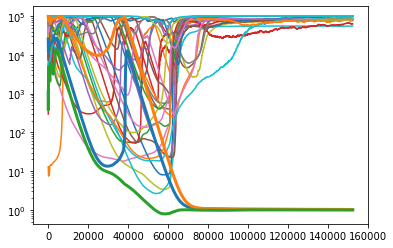

In [38]:
plt.plot(df[prior_keys].ewm(alpha=0.01).mean())
plt.plot(df[prior_keys[2]].ewm(alpha=0.01).mean(), lw=3)
plt.plot(df[prior_keys[4]].ewm(alpha=0.01).mean(), lw=3)
plt.plot(df[prior_keys[7]].ewm(alpha=0.01).mean(), lw=3)

plt.yscale('log')

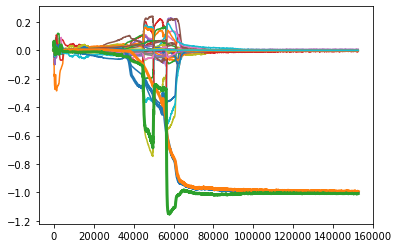

In [27]:
plt.plot(df[coeff_keys].ewm(alpha=0.1).mean())
plt.plot(df[coeff_keys[2]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(df[coeff_keys[4]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(df[coeff_keys[7]].ewm(alpha=0.1).mean(), lw=3)


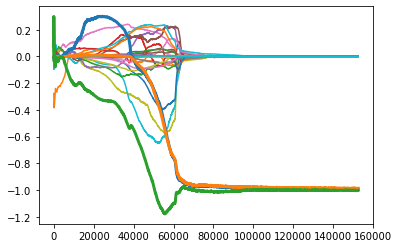

In [35]:
plt.plot(df[bayes_coeff_keys].ewm(alpha=0.1).mean())
plt.plot(df[bayes_coeff_keys[2]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(df[bayes_coeff_keys[4]].ewm(alpha=0.1).mean(), lw=3)
plt.plot(df[bayes_coeff_keys[7]].ewm(alpha=0.1).mean(), lw=3)



In [40]:
u = np.load('KS_u.npy')
x = np.load('KS_x.npy')
t = np.load('KS_t.npy')

In [48]:
u.shape

(1024, 251)

In [41]:
x_grid, t_grid = np.meshgrid(x, t, indexing='ij')

In [42]:
noise = 0.20
u_noisy = u + noise * np.std(u) * np.random.randn(*u.shape)
mask = np.logical_and(t > 45, t < 55)


In [44]:
y = np.array(u_noisy[::4, mask].reshape(-1, 1))
X = np.array(np.concatenate([t_grid[::4, mask].reshape(-1, 1), x_grid[::4, mask].reshape(-1, 1)], axis=1))

print(y.shape)

(6400, 1)


In [51]:
y_noisy = y.reshape(int(u.shape[0] / 4), -1)

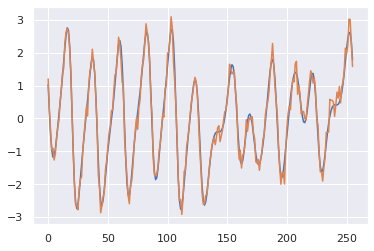

In [64]:
plt.plot(u[::4, mask][:, 20])
plt.plot(y_noisy[:, 20])

In [59]:
np.std(u) * 0.2

0.21344475744892155

In [65]:
u_true = u[::4, mask]
x_plot = x_grid[::4, mask]
t_plot = t_grid[::4, mask]

In [99]:
plt.rcParams.update({'font.size': 8})

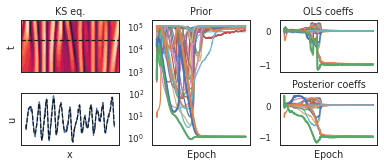

In [126]:
fig = plt.figure(constrained_layout=True, figsize=(0.95 * col_width, 0.4 * col_width))
gs = GridSpec(2, 3, figure=fig)

ax = fig.add_subplot(gs[0, 0])
ax.contourf(x_plot, t_plot, u_true, 20)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('t')
ax.axhline(t_plot[0, 15], linestyle='--', color='k')
#ax.set_xlabel('x')
ax.set_title('KS eq.')

ax = fig.add_subplot(gs[1, 0])
ax.plot(x_plot[:, 15], y_noisy[:, 15])
ax.plot(x_plot[:, 15], u_true[:, 15], 'k--')
ax.set_ylabel('u')
ax.set_xlabel('x')
ax.set_yticks([])
ax.set_xticks([])

ax = fig.add_subplot(gs[:, 1])
ax.plot(df[prior_keys].ewm(alpha=0.01).mean())
ax.plot(df[prior_keys[2]].ewm(alpha=0.01).mean(), lw=2)
ax.plot(df[prior_keys[4]].ewm(alpha=0.01).mean(), lw=2)
ax.plot(df[prior_keys[7]].ewm(alpha=0.01).mean(), lw=2)
ax.set_yscale('log')
ax.set_title('Prior')
ax.set_xticks([])
ax.set_xlabel('Epoch')

ax = fig.add_subplot(gs[0, 2])
ax.plot(df[coeff_keys].ewm(alpha=0.1).mean())
ax.plot(df[coeff_keys[2]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df[coeff_keys[4]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df[coeff_keys[7]].ewm(alpha=0.1).mean(), lw=2)
ax.set_xticks([])
ax.set_title('OLS coeffs')


ax = fig.add_subplot(gs[1, 2])
ax.plot(df[bayes_coeff_keys].ewm(alpha=0.1).mean())
ax.plot(df[bayes_coeff_keys[2]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df[bayes_coeff_keys[4]].ewm(alpha=0.1).mean(), lw=2)
ax.plot(df[bayes_coeff_keys[7]].ewm(alpha=0.1).mean(), lw=2)
ax.set_title('Posterior coeffs')
ax.set_xticks([])
ax.set_xlabel('Epoch')

plt.savefig('KS.pdf', pad_inches=0, bbox_inches='tight')
